In [1]:
""" 
This code is to analysis the atmospheric data between two towers.
Ans the date which we pick up to analyze is 2021/9/8.
"""

' \nThis code is to analysis the atmospheric data between two towers.\nAns the date which we pick up to analyze is 2021/9/8.\n'

In [2]:
""" Import the package. """

import csv
import math
import matplotlib.pyplot as plt

In [3]:
""" Announce the variable and define the parameter. """

eS1, ePrime1, Td1, q1, r1, temp1, rh1, p1 = 0, 0, 0, 0, 0, 0, 0, 0
eS2, ePrime2, Td2, q2, r2, temp2, rh2, p2 = 0, 0, 0, 0, 0, 0, 0, 0
Rd = 287.0  # J/(kg*K)
Rv = 461.5  # J/(kg*K)
list_time = []                                                              # x
list_eS1, list_ePrime1, list_Td1, list_q1, list_r1 = [], [], [], [], []     # y1
list_eS2, list_ePrime2, list_Td2, list_q2, list_r2 = [], [], [], [], []     # y2

In [4]:
""" Open file and pre-processing the data. """
inputFile1 = open("10M_tower_data1.csv", 'r')
inputFile2 = open("10M_tower_data2.csv", 'r')
dataReader1 = csv.reader(inputFile1)
dataReader2 = csv.reader(inputFile2)
# The first towel.

for line1 in dataReader1:
    count = 0
    if line1[1] == '9' and line1[2] == '8':
        list_time.append(float(line1[3]) + (float(line1[4]) / 60.0))
        temp1 = round(float(line1[5]), 1)
        rh1 = round(float(line1[6]), 1)
        p1 = round(float(line1[9]), 1)
        if temp1 == -999 or rh1 == -999 or p1 == -999:
            count += 1
        if count == 0:
            eS1 = round((6.112 * math.exp((17.67 * temp1) / (temp1 + 243.5))), 2)
            list_eS1.append(eS1)
            ePrime1 = round(((rh1/100.0) * eS1), 2)
            list_ePrime1.append(ePrime1)
            Td1 = round(((243.5 * math.log(ePrime1/6.11))/(17.76 - math.log(ePrime1/6.11))), 2)
            list_Td1.append(Td1)
            q1 = round((1000 * (((ePrime1) / (Rv * (temp1 + 273.15))) /
                        (((p1 - ePrime1) / (Rd * (temp1 + 273.15))) + 
                         ((ePrime1) / (Rv * (temp1 + 273.15)))))), 2)
            list_q1.append(q1)
            r1 = round((1000 * (((ePrime1) / (Rv * (temp1 + 273.15))) / 
                       ((p1 - ePrime1) / (Rd * (temp1 + 273.15))))), 2)
            list_r1.append(r1)

inputFile1.close()
# The second toewl.

for line2 in dataReader2:
    count = 0
    if line2[1] == '9' and line2[2] == '8':
        temp2 = round(float(line2[5]), 1)
        rh2 = round(float(line2[6]), 1)
        p2 = round(float(line2[9]), 1)
        if temp2 == -999 or rh2 == -999 or p2 == -999:
            count += 1
        if count == 0:
            eS2 = round((6.112 * math.exp((17.67 * temp2) / (temp2 + 243.5))), 2)
            list_eS2.append(eS2)
            ePrime2 = round(((rh2 / 100.0) * eS2), 2)
            list_ePrime2.append(ePrime2)
            Td2 = round(((243.5 * math.log(ePrime2 / 6.11)) / (17.76 - math.log(ePrime2 / 6.11))), 2)
            list_Td2.append(Td2)
            q2 = round((1000 * (((ePrime2) / (Rv * (temp2 + 273.15))) /
                        (((p2 - ePrime2) / (Rd * (temp2 + 273.15))) + ((ePrime2) / (Rv * (temp2 + 273.15)))))), 2)
            list_q2.append(q2)
            r2 = round((1000 * (((ePrime2) / (Rv * (temp2 + 273.15))) / ((p2 - ePrime2) / (Rd * (temp2 + 273.15))))), 2)
            list_r2.append(r2)

inputFile2.close()

In [5]:
""" Find the maximum and minimum value of each towel and show on the display. """
print(f"Saturated water vapor pressure: maximum: {max(list_eS1)}, {max(list_eS2)}; minimum: {min(list_eS1)}, {min(list_eS2)}")
print(f"Water vapor pressure:           maximum: {max(list_ePrime1)}, {max(list_ePrime2)}; minimum: {min(list_ePrime1)}, {min(list_ePrime2)}")
print(f"Dew point temperature:          maximum: {max(list_Td1)}, {max(list_Td2)}; minimum: {min(list_Td1)}, {min(list_Td2)}")
print(f"Specific humidity:              maximum: {max(list_q1)}, {max(list_q2)}; minimum: {min(list_q1)}, {min(list_q2)}")
print(f"Mixing ratio:                   maximum: {max(list_r1)}, {max(list_r2)}; minimum: {min(list_r1)}, {min(list_r2)}")

Saturated water vapor pressure: maximum: 50.07, 50.36; minimum: 34.22, 34.62
Water vapor pressure:           maximum: 33.27, 37.15; minimum: 23.32, 22.84
Dew point temperature:          maximum: 25.69, 27.55; minimum: 19.86, 19.53
Specific humidity:              maximum: 21.06, 23.53; minimum: 14.73, 14.42
Mixing ratio:                   maximum: 21.52, 24.09; minimum: 14.95, 14.63


In [6]:
""" Plot the each line charts. """

' Plot the each line charts. '

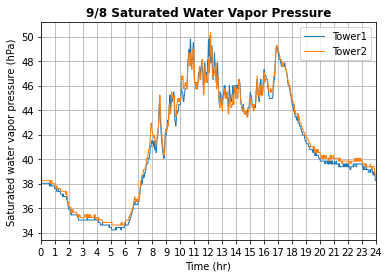

In [7]:
plt.figure("9/8 Saturated Water Vapor Pressure")
plt.plot(list_time, list_eS1, linewidth = 1.0)
plt.plot(list_time, list_eS2, linewidth = 1.0)
plt.xlabel("Time (hr)")
plt.ylabel("Saturated water vapor pressure (hPa)")
plt.legend(["Tower1", "Tower2"])
plt.title("9/8 Saturated Water Vapor Pressure", fontweight = "bold")
plt.xticks(range(0, 25, 1))
plt.xlim(0, 24.0001)
plt.grid()
plt.savefig('./image/Saturated_Water_Vapor_Pressure.png', dpi = 300)

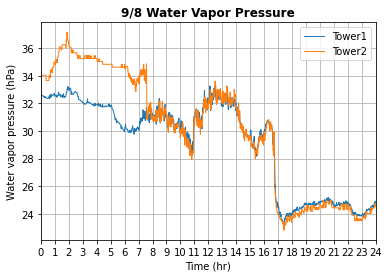

In [8]:
plt.figure("9/8 Water Vapor Pressure")
plt.plot(list_time, list_ePrime1, linewidth = 1.0)
plt.plot(list_time, list_ePrime2, linewidth = 1.0)
plt.xlabel("Time (hr)")
plt.ylabel("Water vapor pressure (hPa)")
plt.legend(["Tower1", "Tower2"])
plt.title("9/8 Water Vapor Pressure", fontweight = "bold")
plt.xticks(range(0, 25, 1))
plt.xlim(0, 24.0001)
plt.grid()
plt.savefig('./image/Water_Vapor_Pressure.png', dpi = 300)

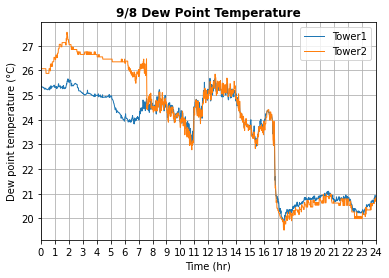

In [9]:
plt.figure("9/8 Dew Point Temperature")
plt.plot(list_time, list_Td1, linewidth = 1.0)
plt.plot(list_time, list_Td2, linewidth = 1.0)
plt.xlabel("Time (hr)")
plt.ylabel("Dew point temperature (°C)")
plt.legend(["Tower1", "Tower2"])
plt.title("9/8 Dew Point Temperature", fontweight = "bold")
plt.xticks(range(0, 25, 1))
plt.xlim(0, 24.0001)
plt.grid()
plt.savefig('./image/Dew_Point_Temperature.png', dpi = 300)

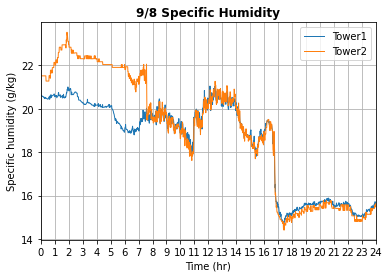

In [10]:
plt.figure("9/8 Specific Humidity")
plt.plot(list_time, list_q1, linewidth = 1.0)
plt.plot(list_time, list_q2, linewidth = 1.0)
plt.xlabel("Time (hr)")
plt.ylabel("Specific humidity (g/kg)")
plt.legend(["Tower1", "Tower2"])
plt.title("9/8 Specific Humidity", fontweight = "bold")
plt.xticks(range(0, 25, 1))
plt.xlim(0, 24.0001)
plt.grid()
plt.savefig('./image/Specific_Humidity.png', dpi = 300)

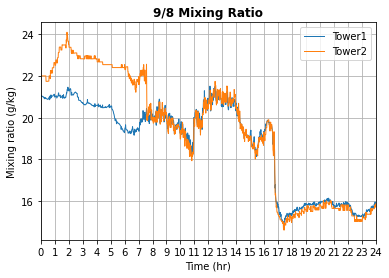

In [11]:
plt.figure("9/8 Mixing Ratio")
plt.plot(list_time, list_r1, linewidth = 1.0)
plt.plot(list_time, list_r2, linewidth = 1.0)
plt.xlabel("Time (hr)")
plt.ylabel("Mixing ratio (g/kg)")
plt.legend(["Tower1", "Tower2"])
plt.title("9/8 Mixing Ratio", fontweight = "bold")
plt.xticks(range(0, 25, 1))
plt.xlim(0, 24.0001)
plt.grid()
plt.savefig('./image/Mixing_Ratio.png', dpi = 300)